In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
file_path = "wallet_credit_scores.csv"
df = pd.read_csv(file_path)
score_col = "credit_score"

In [13]:
# Define bins
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bin_labels = [
    "0-100", "100-200", "200-300", "300-400", "400-500",
    "500-600", "600-700", "700-800", "800-900", "900-1000"
]
df['score_bin'] = pd.cut(df[score_col], bins=bins, labels=bin_labels, right=False, include_lowest=True)

In [14]:
bin_counts = df['score_bin'].value_counts().sort_index()
total = bin_counts.sum()
percentages = (bin_counts / total * 100).round(2)

In [15]:
colors = ['#1FB8CD', '#FFC185', '#ECEBD5', '#5D878F', '#D2BA4C', '#B4413C', '#964325', '#944454', '#13343B', '#DB4545']

C:\Users\kevin\AppData\Local\Temp\ipykernel_13912\1422341846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=bin_labels, y=bin_counts.values, palette=colors)


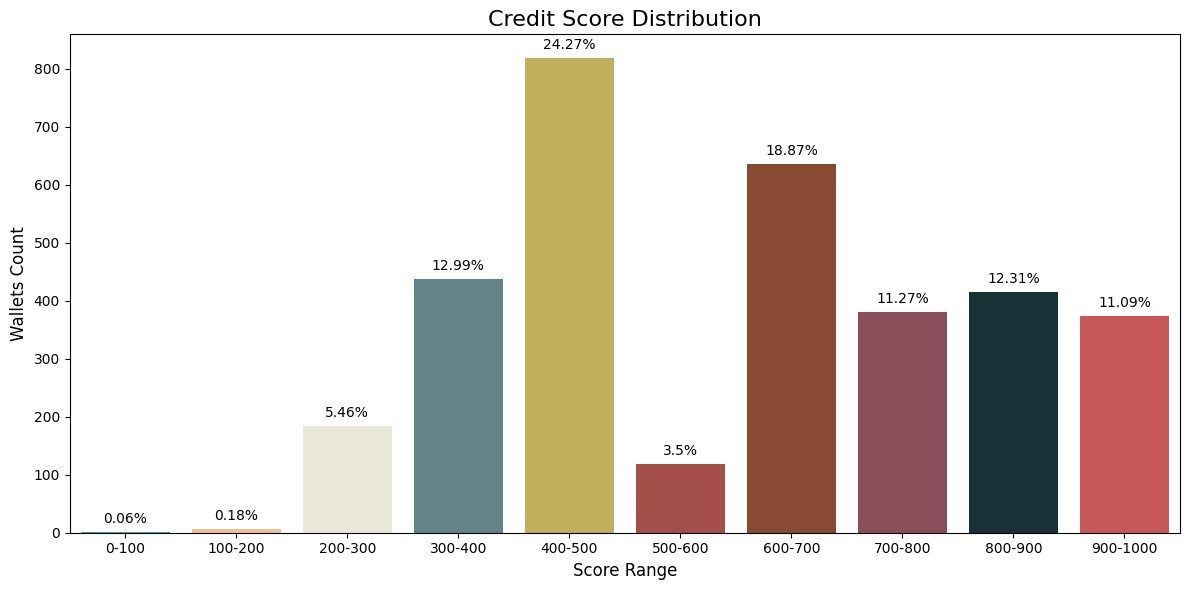

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=bin_labels, y=bin_counts.values, palette=colors)

# Add percentage labels on top
for bar, perc in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f"{perc}%", ha='center', va='bottom', fontsize=10)

# Styling
plt.title("Credit Score Distribution", fontsize=16)
plt.xlabel("Score Range", fontsize=12)
plt.ylabel("Wallets Count", fontsize=12)
plt.tight_layout()

# Save the figure
plt.savefig("output/credit_score_hist_seaborn.png", dpi=300)
plt.show()

In [19]:
features = [
    "total_transactions", "days_active", "total_volume_usd", "unique_assets",
    "repay_to_borrow_ratio", "deposit_to_borrow_ratio", "credit_score"
]

In [20]:
corr = df[features].corr().round(2)["credit_score"].drop("credit_score")

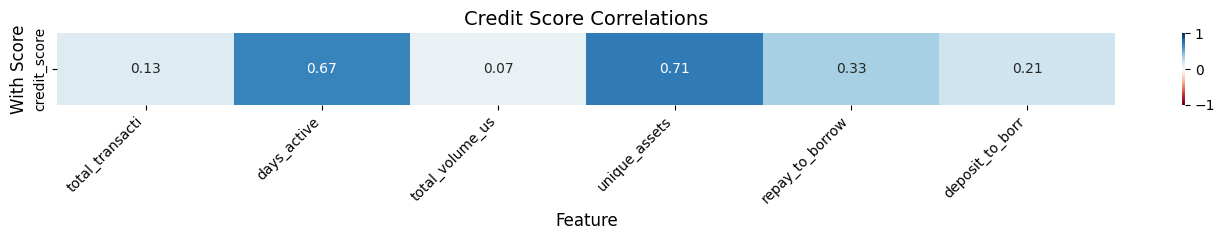

In [ ]:
plt.figure(figsize=(14, 2.5))
ax = sns.heatmap(
    data=pd.DataFrame([corr.values], columns=[f[:15] for f in corr.index]),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    vmin=-1,
    vmax=1,
    cbar=True,
    xticklabels=True,
    yticklabels=["credit_score"]
)

# Styling
plt.title("Credit Score Correlations", fontsize=14)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("With Score", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig("output/correlation_heatmap_seaborn.png", dpi=300)
plt.show()